In [51]:
from gamefitter import *
import pandas as pd
country_names = ['Netherlands', 'Germany', 'Luxembourg', 'Italy', 'Sweden', 'Austria',
       'United Kingdom', 'Finland', 'France', 'Spain', 'Belgium', 'Denmark',
       'Norway', 'Czech Republic', 'Cyprus', 'Ireland', 'Estonia', 'Poland']

In [32]:
population = pickle.load(open('./data/optimization/population_chain_5_9.599.pickle','rb'))
len(population)

60

In [343]:
for i, p in enumerate(population):
    print(i, p['error'], sum(p['starting_state']), len(p['topology']), p['alpha'])

0 9.599768515727634 [5361 5747] 18 0.2776624233565645
1 9.600347215943112 [5065 5531] 18 0.30813850538119014
2 9.655165571973493 [5101 6113] 20 0.2785770940674033
3 9.68331899023608 [5181 5497] 19 0.30808714218718436
4 9.686187187031965 [5168 5714] 18 0.31381070176999304
5 9.69765149118303 [5065 5531] 18 0.29306120723928913
6 9.738811243906746 [5132 6127] 18 0.26777687494352176
7 9.776388790232197 [4994 5663] 20 0.3031694968943711
8 9.778661576219019 [5428 6448] 20 0.22944819868359245
9 9.780933834080805 [4865 5680] 14 0.315484812371299
10 9.827399339488437 [4675 6051] 20 0.3310354651002215
11 9.828529900244492 [4788 5843] 17 0.2816808010165982
12 9.829095131857821 [5008 5672] 20 0.343562458409369
13 9.840957496323437 [5065 5531] 18 0.29306120723928913
14 9.870269612438266 [4951 5860] 19 0.28880679642606233
15 9.894442884771228 [5361 5747] 18 0.2691984217918936
16 9.905666167513532 [5027 5709] 18 0.3048382341220549
17 9.993887020462948 [4999 5649] 16 0.2791336898447132
18 9.99611035464

In [344]:
population[0]

{'starting_state': [array([145, 336]),
  array([225, 240]),
  array([ 88, 101]),
  array([71, 82]),
  array([336, 426]),
  array([704, 520]),
  array([489, 417]),
  array([140, 561]),
  array([255, 278]),
  array([259, 309]),
  array([644, 131]),
  array([490, 543]),
  array([476, 326]),
  array([175, 342]),
  array([190, 608]),
  array([321, 232]),
  array([ 94, 148]),
  array([259, 147])],
 'strategies': [array([[0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]]),
  array([[1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0]]),
  array([[0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1]]),
  array([[0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0]]),
  array([[0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0]]),
  array([[0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]]),
  array([[1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1]]),
  array([[1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]]),
  array([[1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 

In [52]:
p = population[0]
pd.DataFrame(p['starting_state'], index=country_names)

,0,1
Netherlands,145,336
Germany,225,240
Luxembourg,88,101
Italy,71,82
Sweden,336,426
Austria,704,520
United Kingdom,489,417
Finland,140,561
France,255,278
Spain,259,309


In [55]:
[a[0] for a in p['strategies']]

[array([0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0]),
 array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1]),
 array([0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0]),
 array([0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0]),
 array([0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0]),
 array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1]),
 array([1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]),
 array([1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0]),
 array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1])]

In [57]:
pd.DataFrame(np.array([a[0] for a in p['strategies']]).transpose(), index=country_names, columns=list(range(2009,2019)))

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Netherlands,0,1,0,0,0,0,1,1,1,0
Germany,1,1,0,1,1,1,0,0,0,1
Luxembourg,0,0,1,1,0,1,1,0,0,0
Italy,0,0,1,0,1,0,0,1,0,1
Sweden,1,1,1,1,0,0,0,1,0,1
Austria,0,1,0,1,0,0,1,1,1,0
United Kingdom,1,1,0,0,1,0,0,1,1,1
Finland,1,0,0,1,1,1,0,1,0,1
France,1,0,0,1,0,0,0,0,0,1
Spain,0,1,1,1,0,0,0,1,1,1


<IPython.core.display.Javascript object>


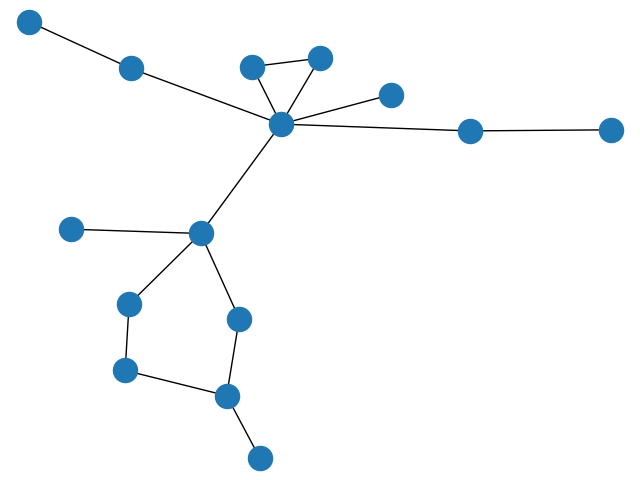

In [34]:
# look at the game graph
hypothesis = population[0]
game_settings = {
            "start_populations_matrix": hypothesis['starting_state'],
            "topology": hypothesis['topology'],
            'alpha': hypothesis['alpha'],
            'log_level': "warning"
        }
game = PolymatrixGame(**game_settings)
import networkx as nx
G = game.network.graph
nx.draw(G)

In [ ]:
# compute gameplay to understand node sizes

In [14]:
node_sizes = [sum(i) for i in population[0]['starting_state']]
node_sizes

[481,
 465,
 189,
 153,
 762,
 1224,
 906,
 701,
 533,
 568,
 775,
 1033,
 802,
 517,
 798,
 553,
 242,
 406]

In [23]:
len(node_sizes)

18

15


<IPython.core.display.Javascript object>


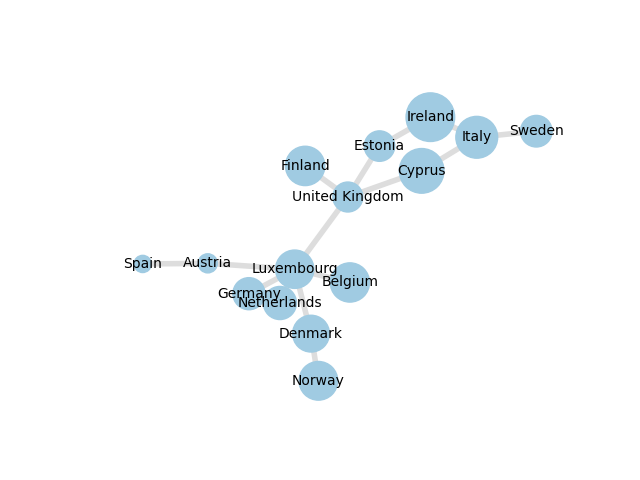

C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\Kinga\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:585: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  and cb.iterable(edge_color) \


In [45]:
def visualize_kg(G):
    # https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html
    # TODO: add edge labels
    %matplotlib nbagg
    import matplotlib.pyplot as plt

    import networkx as nx
    
    def remove_duplicates(x):
        return list(dict.fromkeys(x))

    edges = remove_duplicates(list(G.edges()))
    m = len(edges)
    nodes = list(G.nodes())
    n = len(nodes)
    print(len(nodes))
    pos=nx.spring_layout(G) # positions for all nodes
    
    # some math labels
    labels={}
    for node in nodes:
        labels[node] = str(country_names[node])
    
    colors=['#DDDDDD']*m
    nx.draw_networkx_labels(G,pos,labels,font_size=10)
    nx.draw(G, pos, node_size = node_sizes[0:n], node_color='#A0CBE2', edge_color=colors, width=4, edge_cmap=plt.cm.Blues, with_labels=False)

    plt.axis('off')
    plt.savefig("labels_and_colors.png") # save as png
    plt.show() # display
visualize_kg(G)

In [67]:
new_pops = []
for p in population:
    for i, arr in enumerate(p['starting_state']):
        for j, elem in enumerate(arr):
            if elem<0:
                p['starting_state'][i][j]=0
    p['error']=None
    new_pops.append(p)
print(len(new_pops))
pickle.dump(new_pops, open('./data/optimization/population_edge_3_11.xx.pickle','wb'))

70


## Crossing over

In [220]:
p1 = population[7]
p1

{'starting_state': [array([ 9, 47]),
  array([12, 34]),
  array([13, 18]),
  array([63,  2]),
  array([ 9, 48]),
  array([ 8, 38]),
  array([67,  2]),
  array([35, 28]),
  array([45, 48]),
  array([56,  9]),
  array([25, 12]),
  array([45, 60]),
  array([50, 20]),
  array([39, 64]),
  array([32, 42]),
  array([18, 18]),
  array([59,  0]),
  array([70, 12])],
 'strategies': [array([[0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0]]),
  array([[1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0]]),
  array([[1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0]]),
  array([[1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0]]),
  array([[0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
  array([[1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0]]),
  array([[1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1]]),
  array([[1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0]]),
  array([[1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0]]),
  array([[1, 0, 1, 0, 

In [211]:
p2 = population[10]

In [228]:
p2['strategies'][1][0][1]

1

In [238]:

def crossing_over(p1, p2):
    p3 = p1.copy()
    p3['error']=None
    z = zip(p1['starting_state'],p2['starting_state'])
    p3['starting_state']=[np.array((int((b[0][0]+b[1][0])/2),int((b[0][1]+b[1][1])/2))) for b in z]
    p3['alpha']=(p1['alpha']+p2['alpha'])/2
    #print(p1['topology'],p2['topology'])
    s1 = set([tuple(p) for p in p1['topology']])
    s2 = set([tuple(p) for p in p2['topology']])
    intersection = s1.intersection(s2)
    unique_s1 = s1.difference(intersection)
    unique_s2 = s2.difference(intersection)
    candidate_edges = unique_s1.union(unique_s2)
    chosen_edges = []
    for edge in candidate_edges:
        if np.random.randint(0,2)==1:
            chosen_edges.append(edge)
    p3['topology'] = list(intersection.union(set(chosen_edges)))
    for i, sv in enumerate(p3['strategies']):
        for j, s in enumerate(sv):
            if p3['strategies'][i][0][j]!=p2['strategies'][i][0][j]:
                p2['strategies'][i][0][j]=np.random.randint(0,2)
    return p3

crossing_over(population[7],population[10])

{'starting_state': [array([174, 369]),
  array([464, 594]),
  array([ 37, 504]),
  array([416, 541]),
  array([561, 475]),
  array([264, 552]),
  array([227, 302]),
  array([625, 312]),
  array([536, 384]),
  array([308, 332]),
  array([294, 564]),
  array([485, 287]),
  array([260, 325]),
  array([307, 220]),
  array([328, 317]),
  array([460, 185]),
  array([286, 409]),
  array([373, 433])],
 'strategies': [array([[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1]]),
  array([[0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0]]),
  array([[1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0]]),
  array([[1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0]]),
  array([[0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0]]),
  array([[0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0]]),
  array([[1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0]]),
  array([[1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0]]),
  array([[1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1

In [3]:
from corpgame import PolymatrixGame
import numpy as np
import pickle

def in_list(candidate, full_list):
    for element in full_list:
        if candidate==element:
            return True
    return False


game_settings = {
        "start_populations_matrix": [[5, 10], [5, 5], [15, 5], [15, 5], [30, 5],[3,17]],
        "topology": "chain",
        'alpha': 0.7,
        'log_level': "warning"
    }
game = PolymatrixGame(**game_settings)
self = game.network
print(game.network.graph.edges)

keep_looking = True
n = len(self.graph.nodes)
m = len(self.graph.edges)
if m<n*(n-1)/2:
    edges = list(self.graph.edges)
    nodes = list(range(0,n))
    possible_edges = [
                    [nodes[i], nodes[j]]
                    for i in range(len(nodes))
                    for j in range(i + 1, len(nodes))
                ]
    temp_graph = self.graph.copy()
    while keep_looking and len(possible_edges)!=0: # try to remove edges but only if it doesn't disconnect the graph
        edge_candidate = tuple(possible_edges.pop(np.random.randint(0,len(possible_edges))))
        #print(edge_candidate, edges, in_list(edge_candidate, edges))
        if not in_list(edge_candidate, edges):
            temp_graph.add_edge(*edge_candidate)
            self.graph = temp_graph.copy()
            keep_looking=False
print(self.graph.edges)

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5)]
[(0, 1), (1, 2), (1, 5), (2, 3), (3, 4), (4, 5)]


In [39]:
print(game.network.graph.edges)

keep_looking = True
n = len(self.graph.nodes)
m = len(self.graph.edges)
if m<n*(n-1)/2:
    edges = list(self.graph.edges)
    nodes = list(range(0,n))
    possible_edges = [
                    [nodes[i], nodes[j]]
                    for i in range(len(nodes))
                    for j in range(i + 1, len(nodes))
                ]
    temp_graph = self.graph.copy()
    while keep_looking and len(possible_edges)!=0: # try to remove edges but only if it doesn't disconnect the graph
        edge_candidate = tuple(possible_edges.pop(np.random.randint(0,len(possible_edges))))
        #print(edge_candidate, edges, in_list(edge_candidate, edges))
        if not in_list(edge_candidate, edges):
            temp_graph.add_edge(*edge_candidate)
            self.graph = temp_graph.copy()
            keep_looking=False
print(self.graph.edges)

[(0, 1), (0, 2), (0, 3), (0, 5), (0, 4), (1, 2), (1, 5), (1, 3), (1, 4), (2, 3), (2, 5), (2, 4), (3, 4), (3, 5), (4, 5)]
[(0, 1), (0, 2), (0, 3), (0, 5), (0, 4), (1, 2), (1, 5), (1, 3), (1, 4), (2, 3), (2, 5), (2, 4), (3, 4), (3, 5), (4, 5)]


In [41]:
n = 18
nodes = list(range(n))

edges = [
            [nodes[i], nodes[j]]
            for i in range(len(nodes))
            for j in range(i + 1, len(nodes))
        ]

edges = list(np.random.permutation(list(edges)))
edges

[array([3, 7]),
 array([ 8, 14]),
 array([7, 8]),
 array([ 3, 12]),
 array([11, 17]),
 array([ 9, 14]),
 array([0, 1]),
 array([ 7, 10]),
 array([10, 14]),
 array([12, 15]),
 array([ 3, 10]),
 array([ 2, 14]),
 array([ 1, 11]),
 array([1, 5]),
 array([ 0, 10]),
 array([10, 13]),
 array([ 5, 16]),
 array([5, 6]),
 array([1, 9]),
 array([5, 8]),
 array([5, 9]),
 array([12, 16]),
 array([1, 2]),
 array([4, 9]),
 array([11, 15]),
 array([10, 12]),
 array([4, 7]),
 array([2, 9]),
 array([ 9, 16]),
 array([2, 8]),
 array([2, 4]),
 array([3, 9]),
 array([ 7, 14]),
 array([8, 9]),
 array([ 2, 17]),
 array([0, 5]),
 array([1, 4]),
 array([ 1, 16]),
 array([ 4, 11]),
 array([ 0, 11]),
 array([0, 3]),
 array([ 6, 15]),
 array([ 1, 13]),
 array([ 2, 12]),
 array([ 0, 13]),
 array([1, 8]),
 array([ 6, 10]),
 array([15, 16]),
 array([4, 6]),
 array([3, 6]),
 array([7, 9]),
 array([1, 6]),
 array([0, 2]),
 array([ 2, 16]),
 array([ 1, 17]),
 array([0, 9]),
 array([2, 7]),
 array([ 2, 11]),
 array([6,

In [ ]:
if np.random.randint==
if len(game.network.graph.edges)>(len(game.players)-1):
    game.network.remove_random_edge()
    hypothesis['topology'] = list(game.network.graph.edges)
return hypothesis